In [29]:
!pip install "stable_baselines3[extra]>=2.0.0a9"
!pip install gym

In [30]:

import gym
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env
import os
import time


In [31]:
# Saving logs to visulise in Tensorboard, saving models
models_dir = f"models/Mountain-{time.time()}"
logdir = f"logs/Mountain-{time.time()}"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
if not os.path.exists(logdir):
    os.makedirs(logdir)

In [32]:
# Parallel environments
env = make_vec_env("MountainCarContinuous-v0", n_envs=1)

In [65]:
# The learning agent and hyperparameters
model = PPO(
    policy=MlpPolicy,
    env=env,
    seed=0,
    batch_size=256,
    ent_coef=0.1, # Increase to encourage more exploration
    learning_rate=0.0003, # Increased learning rate
    n_epochs=10,
    n_steps=2048, # Increased number of steps per batch
    gae_lambda=0.95, # Adjusted lambda
    gamma=0.99, # Adjusted gamma
    clip_range=0.2, # Keep the same clip range
    max_grad_norm=0.5, # Decreased max grad norm
    vf_coef=0.5, # Increased value function coefficient
    use_sde=True,
    policy_kwargs=dict(net_arch=[64, 64], log_std_init=-0.5, ortho_init=False), # Adjusted network architecture and initial log std
    verbose=1,
    tensorboard_log=logdir,
)

Using cpu device


In [ ]:
#Training and saving models along the way
TIMESTEPS = 20000
for i in range(10): 
    model.learn(total_timesteps=TIMESTEPS,reset_num_timesteps=False, tb_log_name="PPO")
    model.save(f"{models_dir}/{TIMESTEPS*i}")

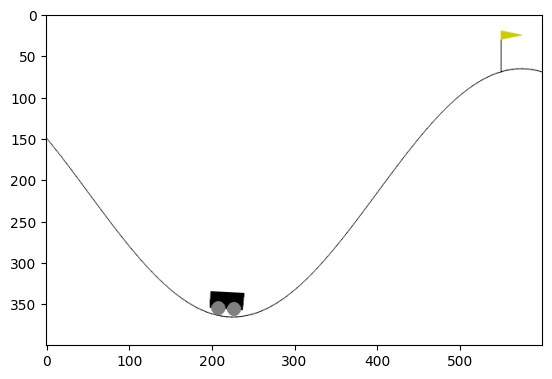

In [74]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt

# Check model performance
# load the best model you observed from tensorboard - the one reach the goal/ obtaining highest return
models_dir = "models/Mountain-1687190772.726302"
model_path = f"{models_dir}/140000"
best_model = PPO.load(model_path, env=env)
obs = env.reset()

# Start the rendering process
img = plt.imshow(env.render(mode='rgb_array'))

# For each step, update the display
while True:
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    img.set_data(env.render(mode='rgb_array')) 
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if dones:
        break

